  0%|          | 0/27 [00:00<?, ?it/s]

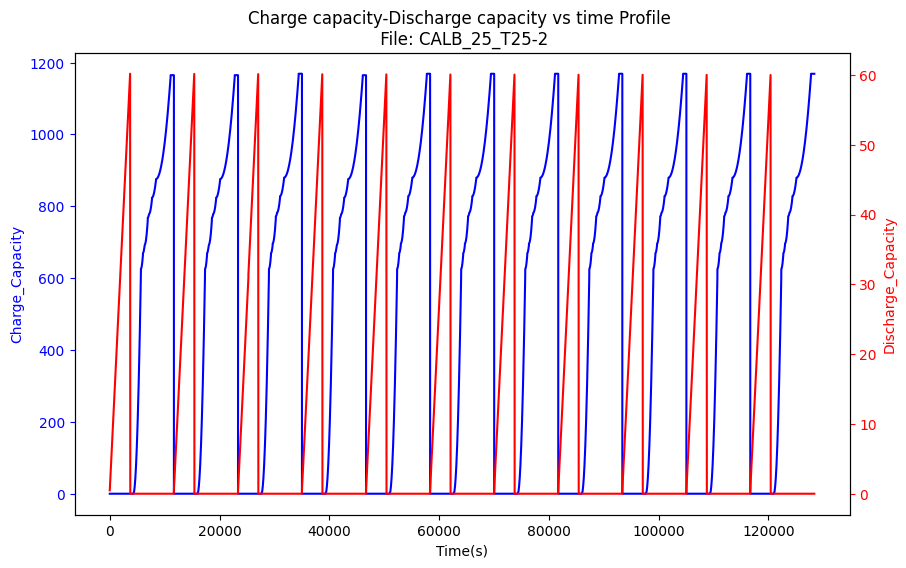

  4%|▎         | 1/27 [00:00<00:04,  5.43it/s]

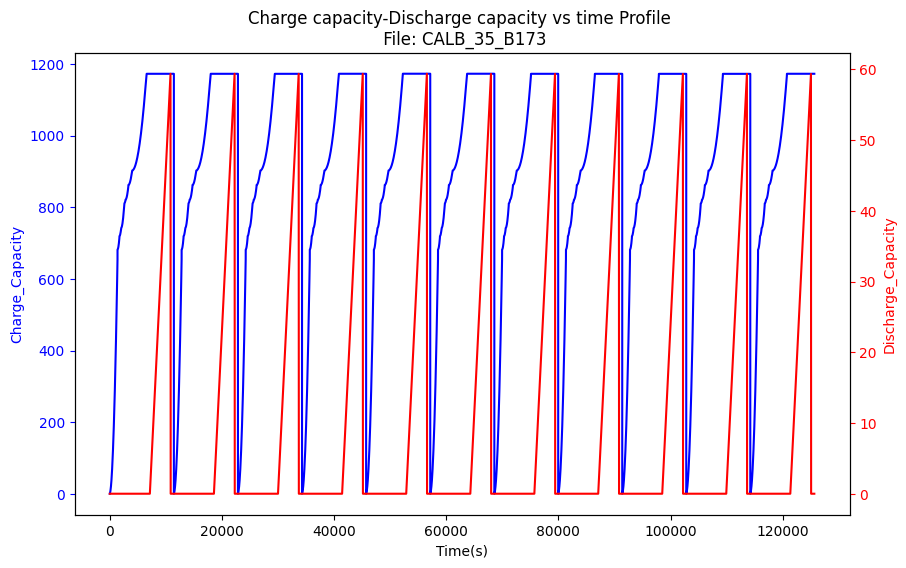

  7%|▋         | 2/27 [00:00<00:04,  5.26it/s]

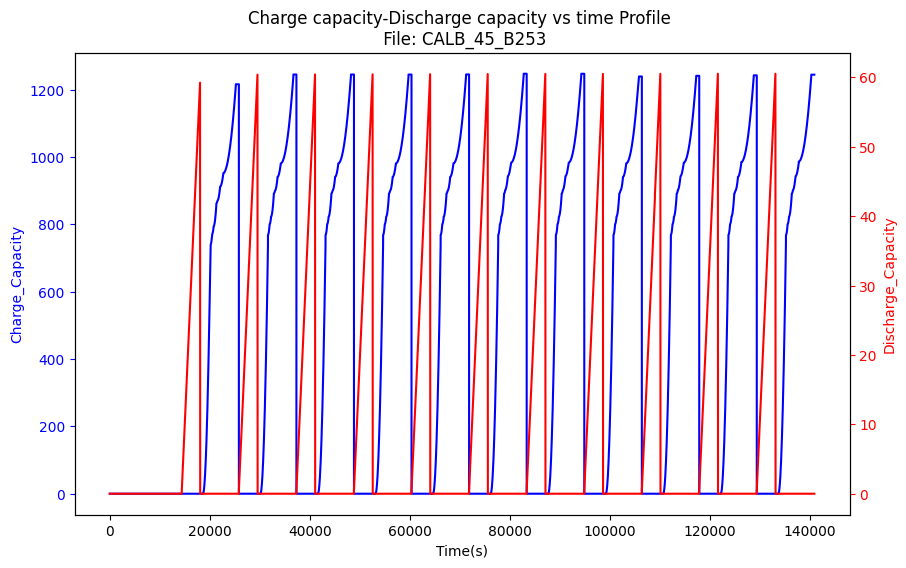

 11%|█         | 3/27 [00:00<00:04,  5.25it/s]

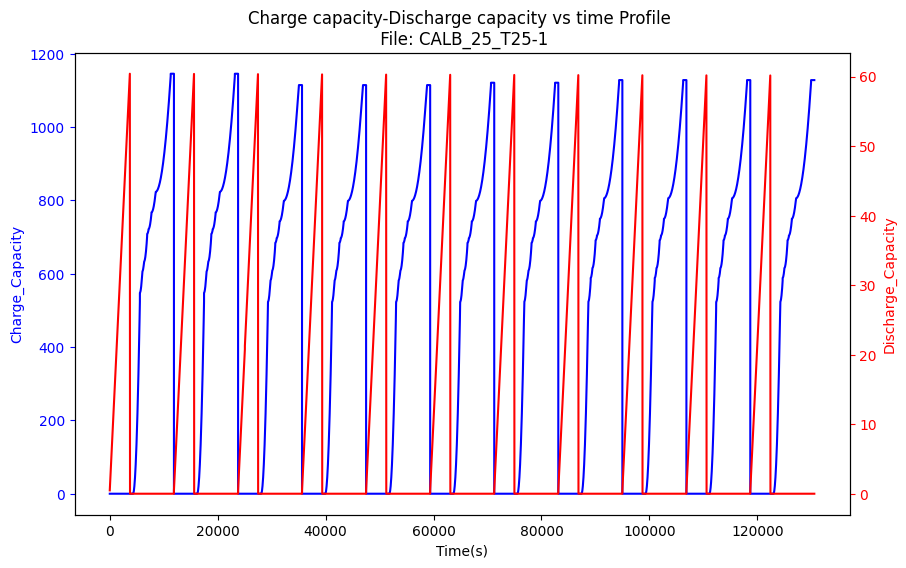

 15%|█▍        | 4/27 [00:00<00:04,  5.32it/s]

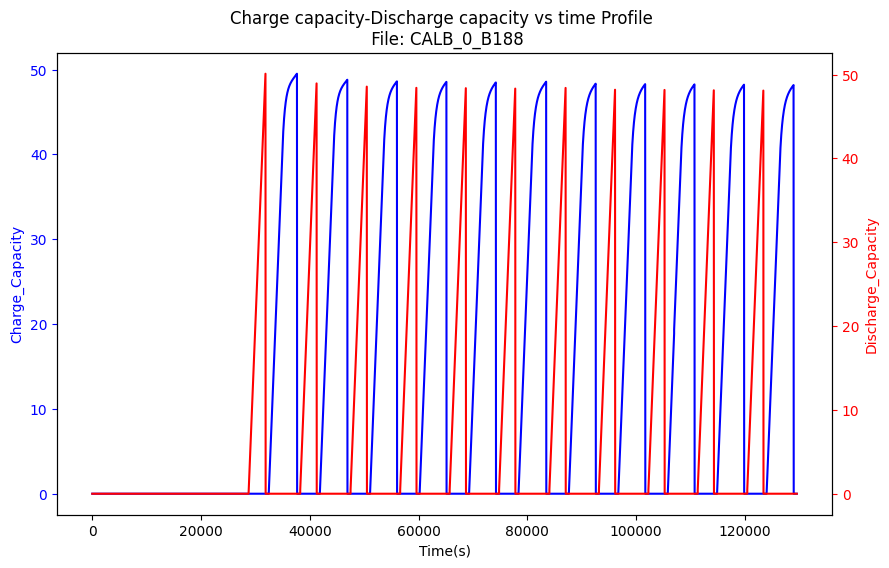

 19%|█▊        | 5/27 [00:00<00:04,  5.33it/s]

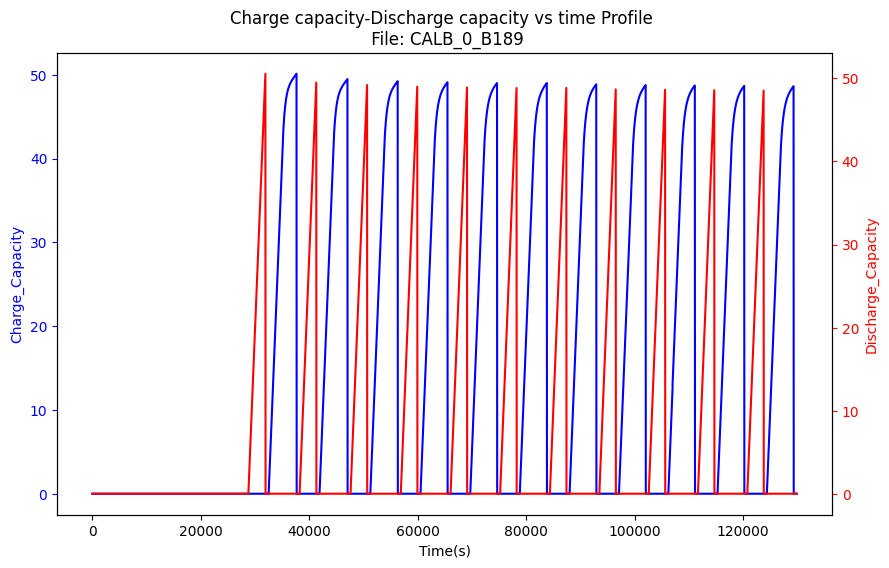

 22%|██▏       | 6/27 [00:01<00:03,  5.43it/s]

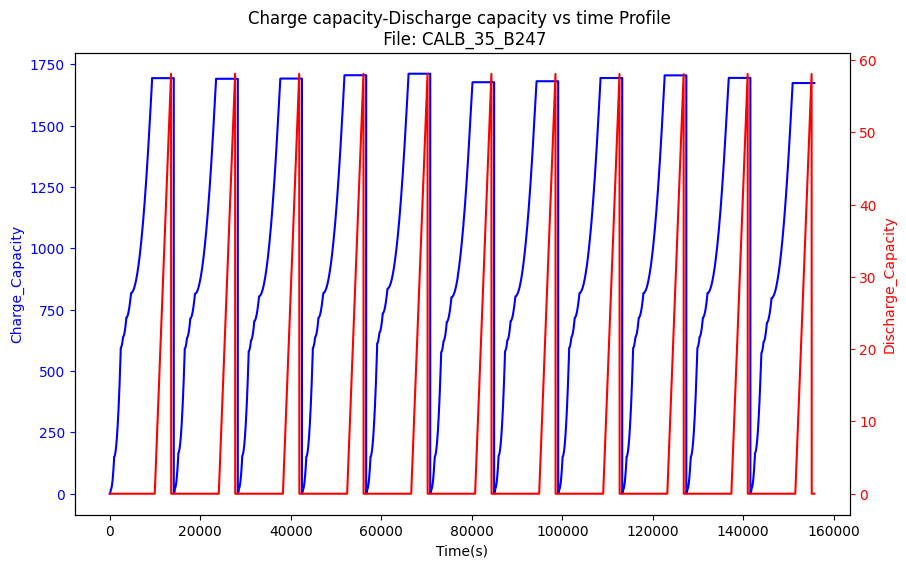

 26%|██▌       | 7/27 [00:01<00:03,  5.32it/s]

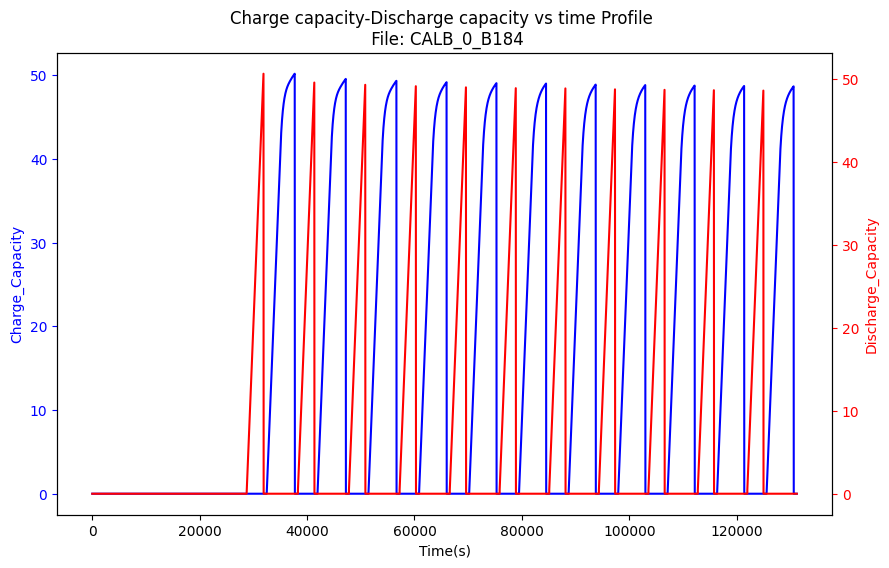

 30%|██▉       | 8/27 [00:01<00:04,  4.44it/s]

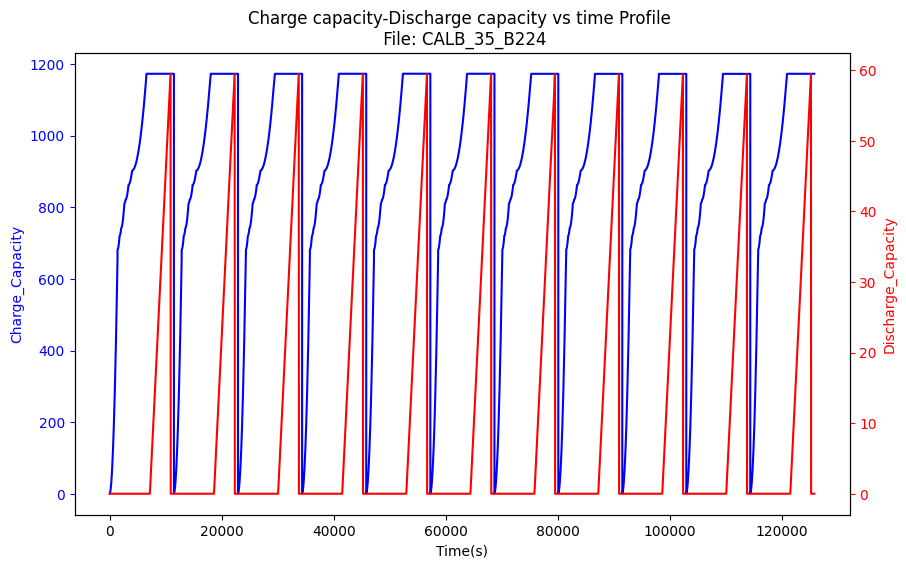

 33%|███▎      | 9/27 [00:01<00:03,  4.65it/s]

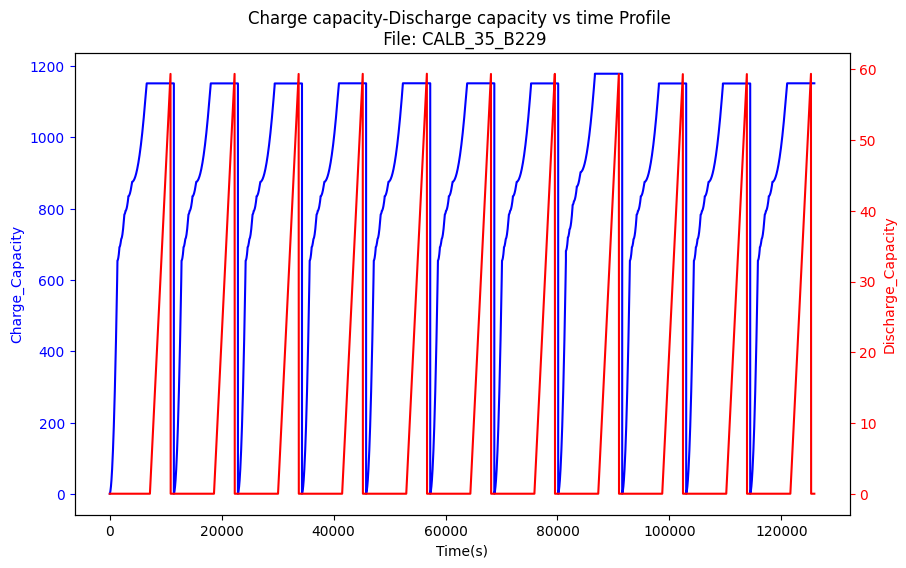

 37%|███▋      | 10/27 [00:02<00:03,  4.76it/s]

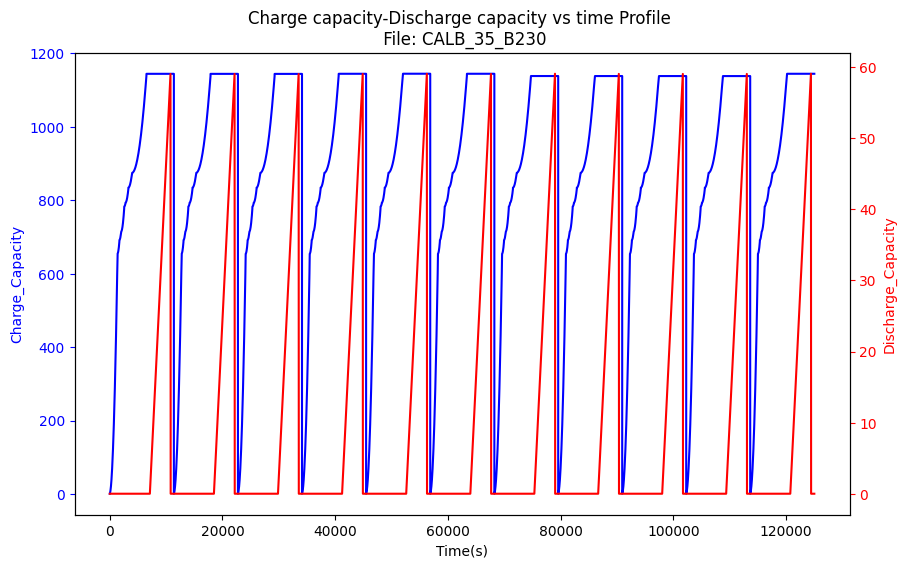

 41%|████      | 11/27 [00:02<00:03,  4.94it/s]

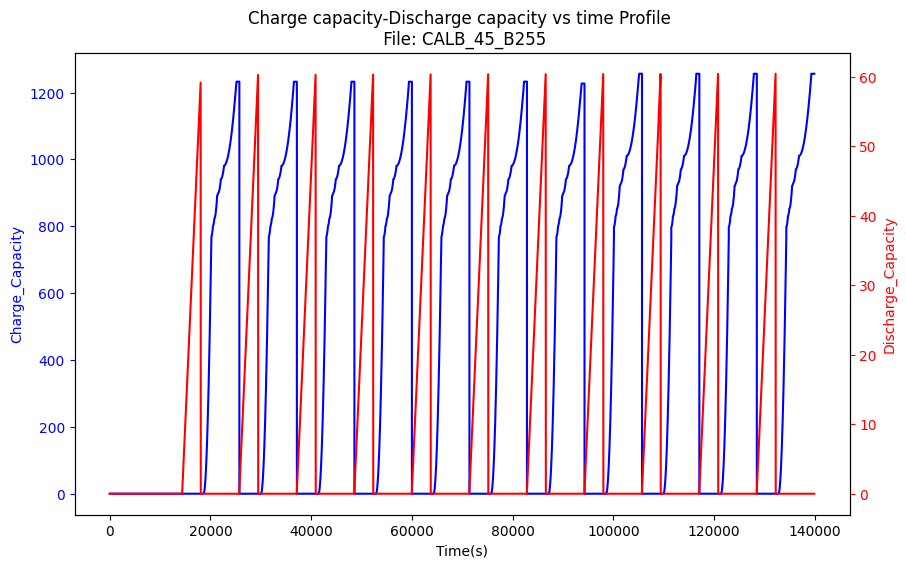

 44%|████▍     | 12/27 [00:02<00:02,  5.03it/s]

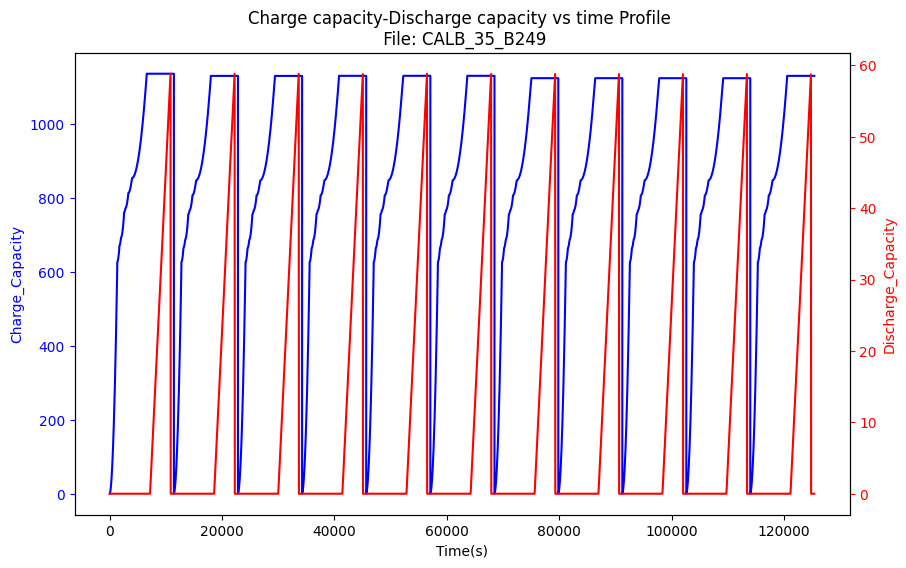

 48%|████▊     | 13/27 [00:02<00:02,  5.15it/s]

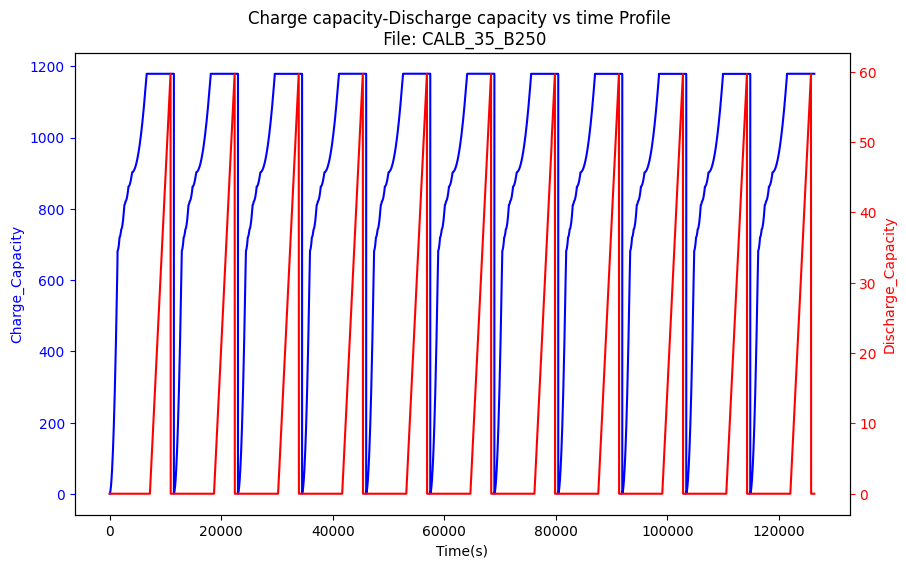

 52%|█████▏    | 14/27 [00:02<00:02,  5.21it/s]

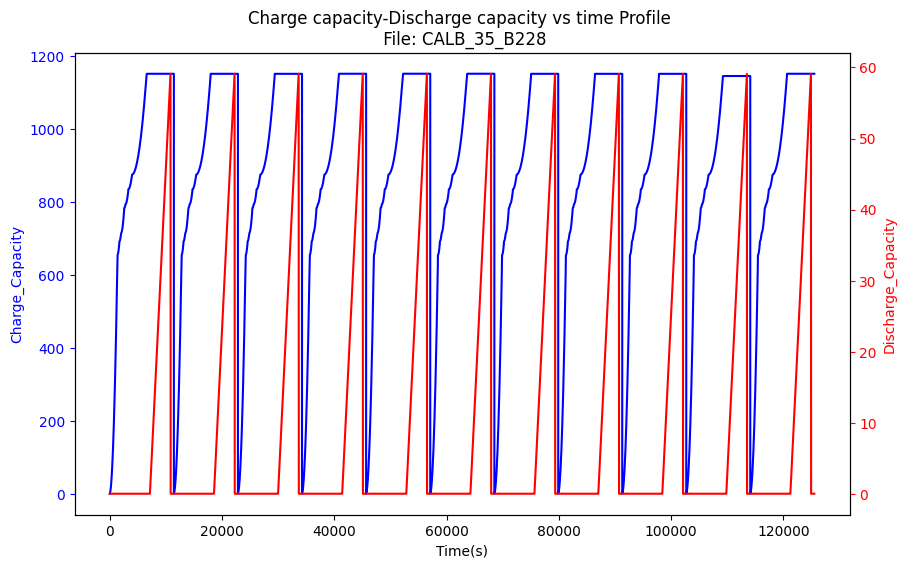

 56%|█████▌    | 15/27 [00:02<00:02,  5.26it/s]

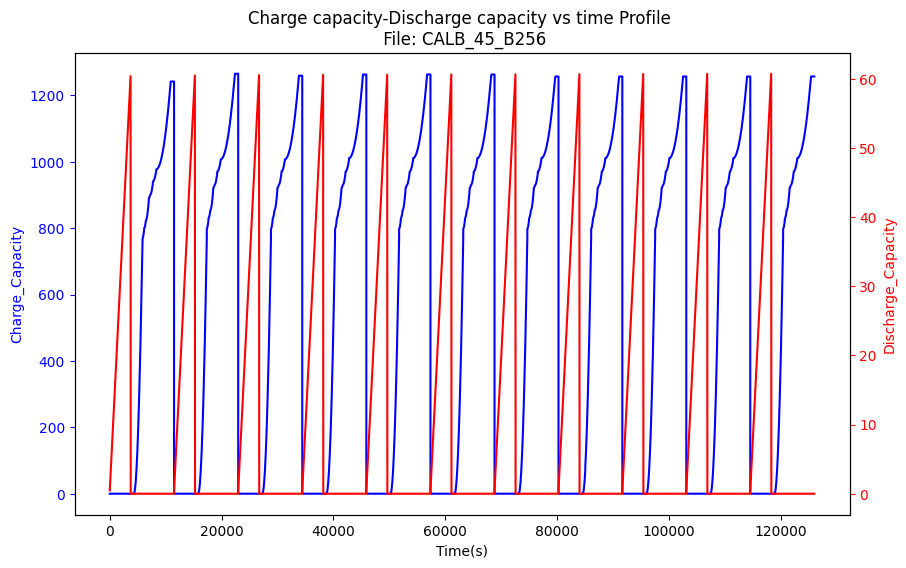

 59%|█████▉    | 16/27 [00:03<00:02,  5.30it/s]

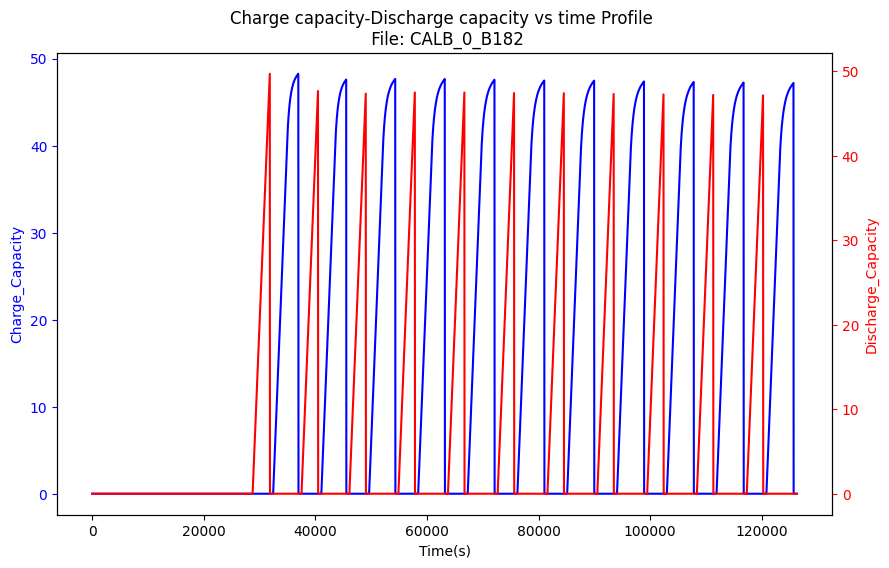

 63%|██████▎   | 17/27 [00:03<00:02,  4.50it/s]

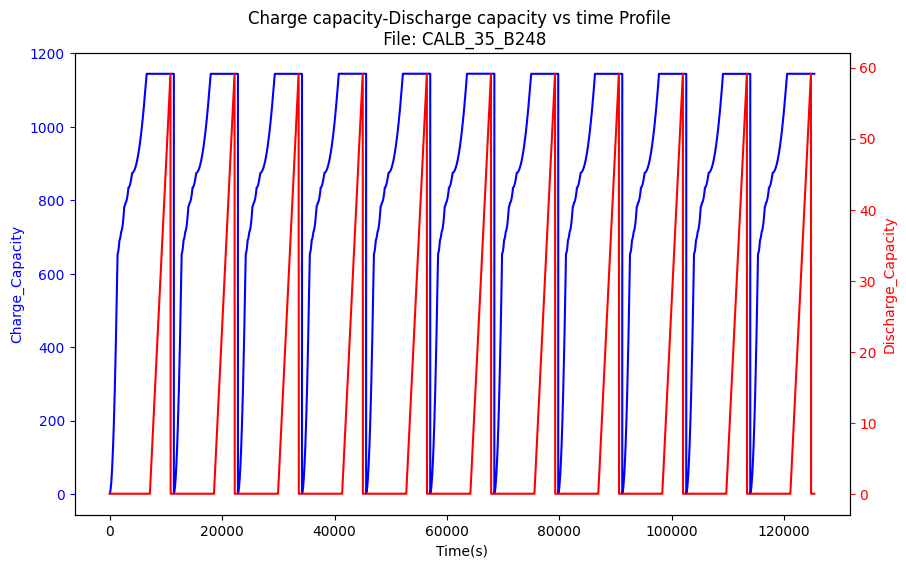

 67%|██████▋   | 18/27 [00:03<00:01,  4.73it/s]

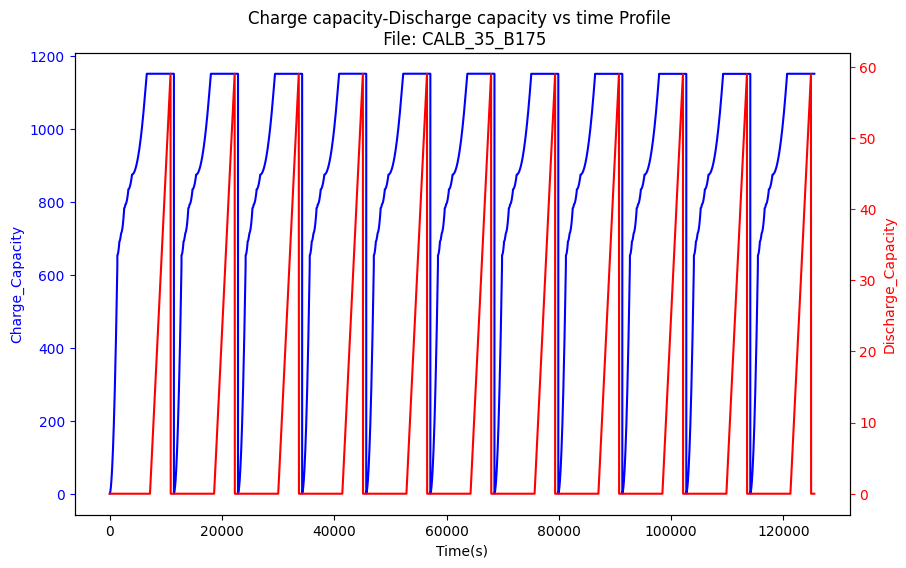

 70%|███████   | 19/27 [00:03<00:01,  4.86it/s]

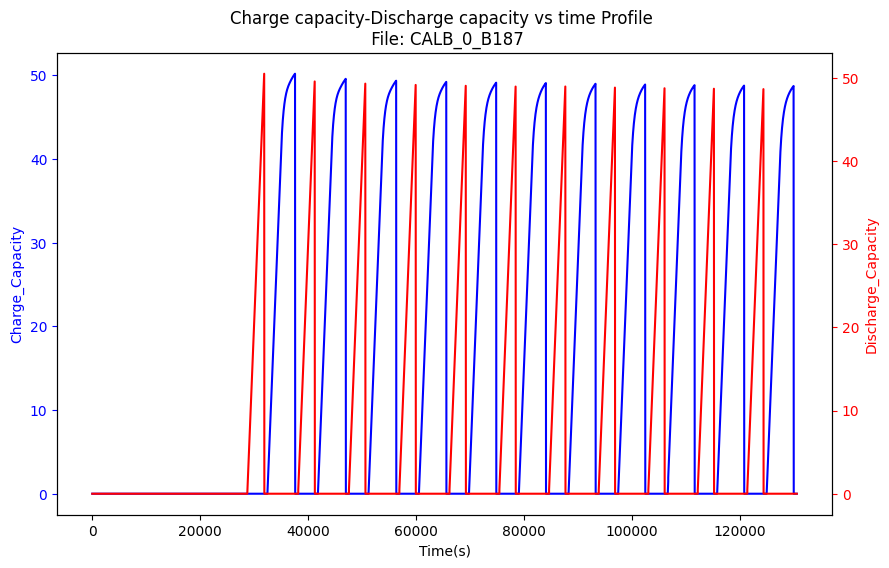

 74%|███████▍  | 20/27 [00:03<00:01,  5.02it/s]

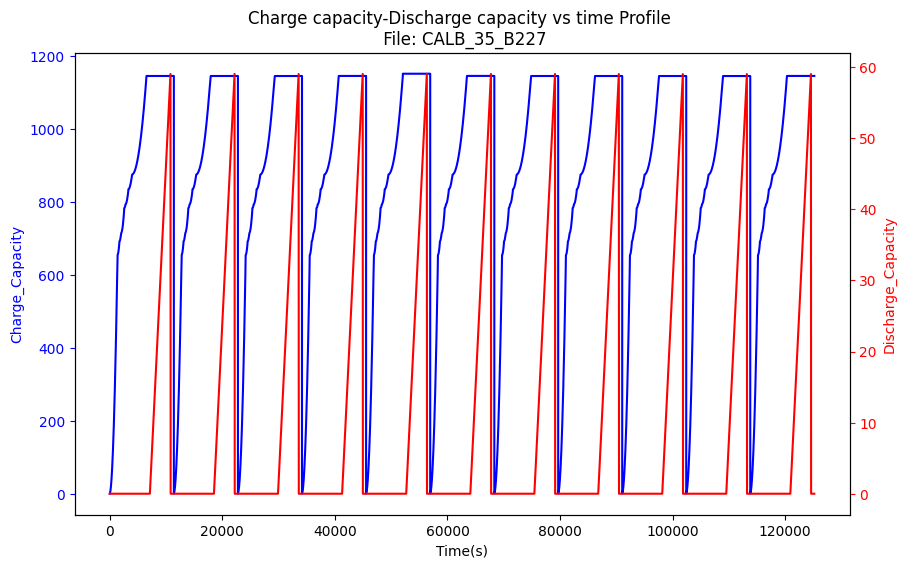

 78%|███████▊  | 21/27 [00:04<00:01,  5.12it/s]

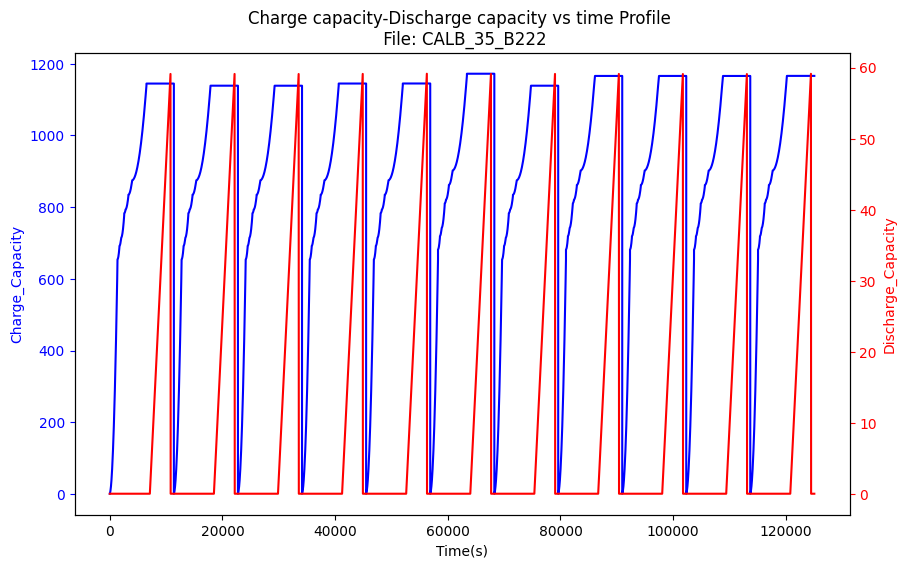

 81%|████████▏ | 22/27 [00:04<00:00,  5.19it/s]

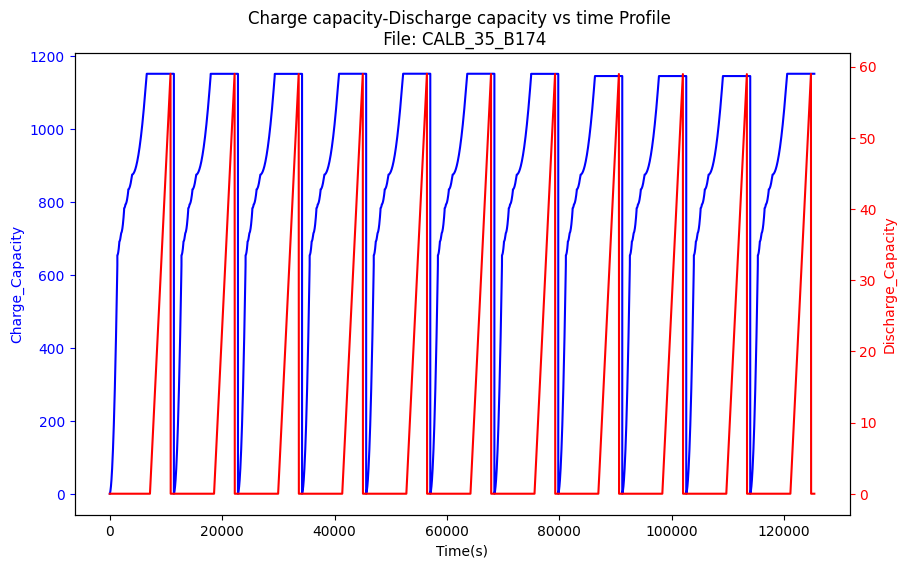

 85%|████████▌ | 23/27 [00:04<00:00,  5.24it/s]

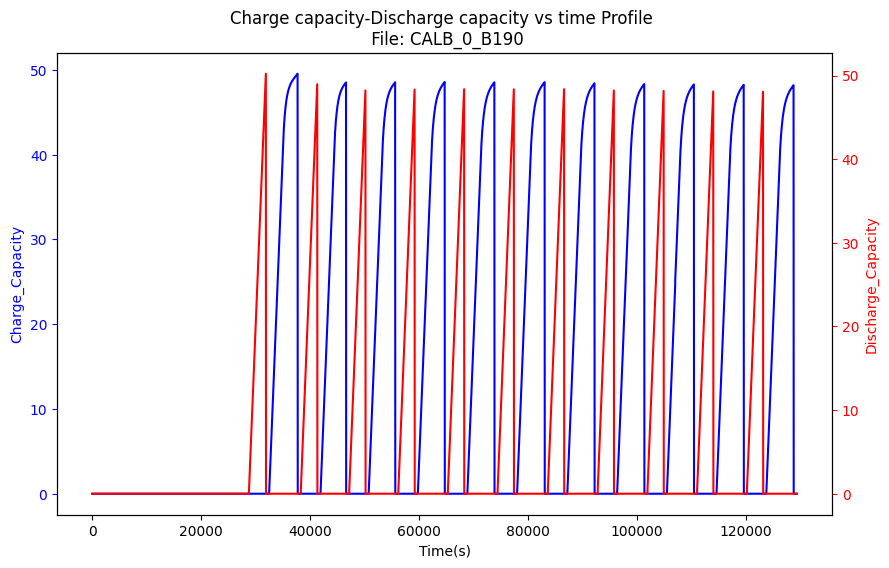

 89%|████████▉ | 24/27 [00:04<00:00,  5.36it/s]

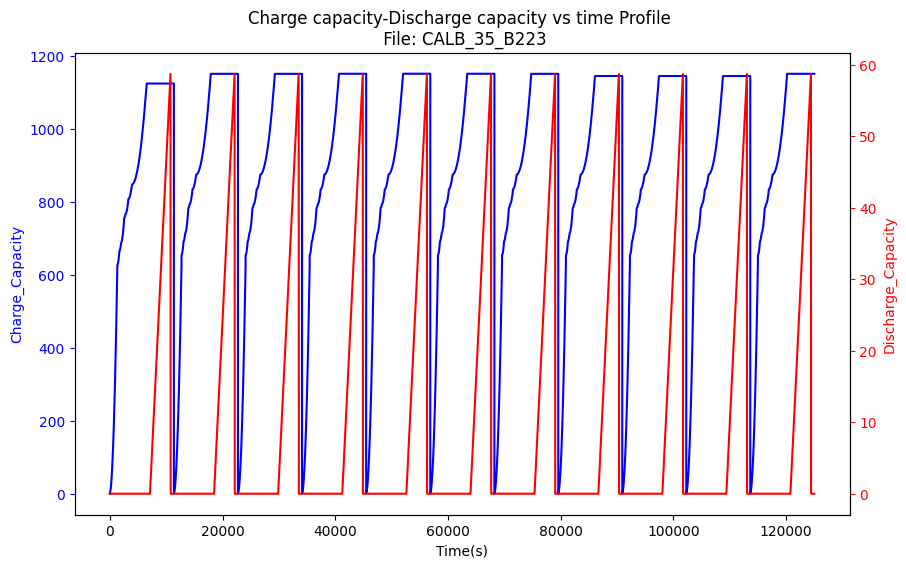

 93%|█████████▎| 25/27 [00:04<00:00,  5.38it/s]

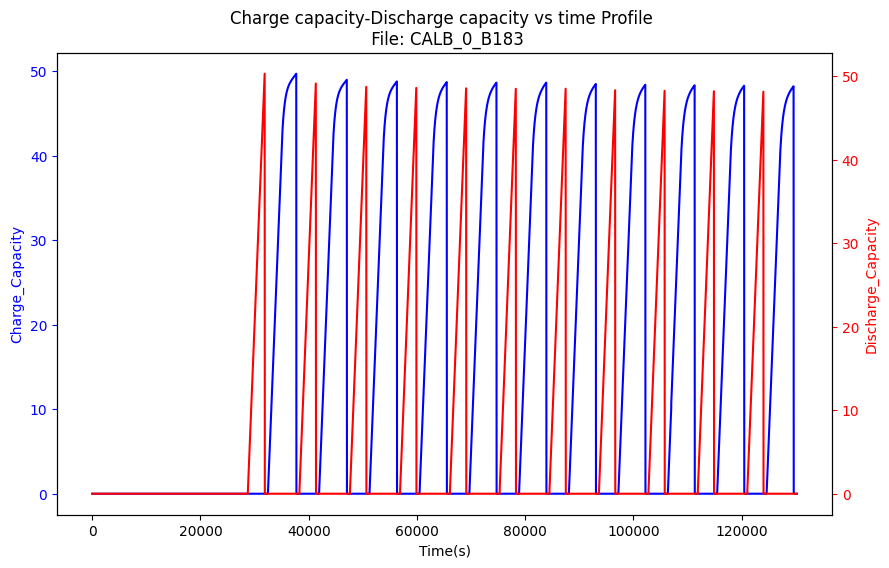

 96%|█████████▋| 26/27 [00:05<00:00,  4.68it/s]

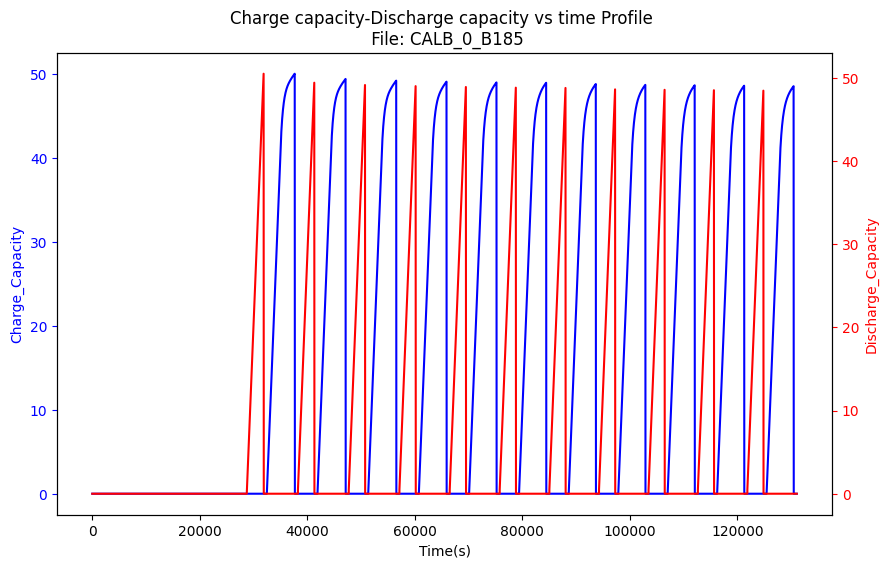

100%|██████████| 27/27 [00:05<00:00,  5.03it/s]


In [2]:
import os
import pickle
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL.ImageColor import colormap
from sympy.physics.control.control_plots import matplotlib
from tqdm import tqdm
import seaborn as sns

path = '/data/trf/python_works/BatteryLife/dataset/CALB/' # enter the dataset path
ppath = Path(path)
files = os.listdir(path)
files = [i for i in files if i.endswith('.pkl')]
soc = []
cell = []

life_label = []
data = {}
for file in tqdm(files):
    with open(path + f'{file}', 'rb') as f:
        cell_data = pickle.load(f)
        filename = file.split('.pkl')[0]
        length = len(cell_data['cycle_data'])
        capacity = cell_data['nominal_capacity_in_Ah']
        df = pd.DataFrame()
        soh = []
        cycles = 0
        charge_caps = []
        discharge_caps = []
        times = []
        for i in range(0, length):
            if i > 10:
                break

            cycle_df = pd.DataFrame()
            cycle_data_len = len(cell_data['cycle_data'][i])
            cycle_data = cell_data['cycle_data'][i]

            cycle_df['current'] = cycle_data['current_in_A']
            cycle_df['voltage'] = cycle_data['voltage_in_V']
            cycle_df['charge_capacity'] = cycle_data['charge_capacity_in_Ah']
            cycle_df['discharge_capacity'] = cycle_data['discharge_capacity_in_Ah']
            cycle_df['test time'] = cycle_data['time_in_s']
            cycle_df['cycle_number'] = cycle_data['cycle_number']
            soh_value = cycle_df.loc[cycle_df['current'] < 0, 'discharge_capacity'].max()

            charge_cap = cycle_df['charge_capacity'].values.tolist()
            discharge_cap = cycle_df['discharge_capacity'].values.tolist()
            time = cycle_df['test time'].values.tolist()

            charge_caps += charge_cap
            discharge_caps += discharge_cap
            times += time

        fig, ax1 = plt.subplots(figsize=(10, 6))

        ax1.plot(times, charge_caps, 'b-')
        ax1.set_xlabel('Time(s)')
        ax1.set_ylabel('Charge_Capacity', color='b')
        ax1.tick_params('y', colors='b')

        ax2 = ax1.twinx()
        ax2.plot(times, discharge_caps, 'r-')
        ax2.set_ylabel('Discharge_Capacity', color='r')
        ax2.tick_params('y', colors='r')

        plt.title('Charge capacity-Discharge capacity vs time Profile \n File: {}'.format(filename))
        plt.show()

